## Toy simulation of pion flux

### BMPT Parameterisation
We can take inspiration for the flux of hadrons coming off the target from the BMPT paramterisation which was put together for the CNGS Beryllium target, https://arxiv.org/abs/hep-ph/0101163. MIPP theses showed that the general shape of these parameterisations were good descriptions of the MIPP pion/kaon ratios https://inspirehep.net/files/1c5fd61155127814ebeb6bfbd6028d00.

In [1]:
%run config.py

In [2]:
from particle import PDGID, Particle
from hepunits.units import keV, MeV, GeV
from hepunits import units as u

from NumiBeamline import * #Lazy
from LazyKinematics import LazyKinematics as lk
from LazyKinematics import NeutrinoTarget
from BMPTFlux import BMPTFlux

K
0.0


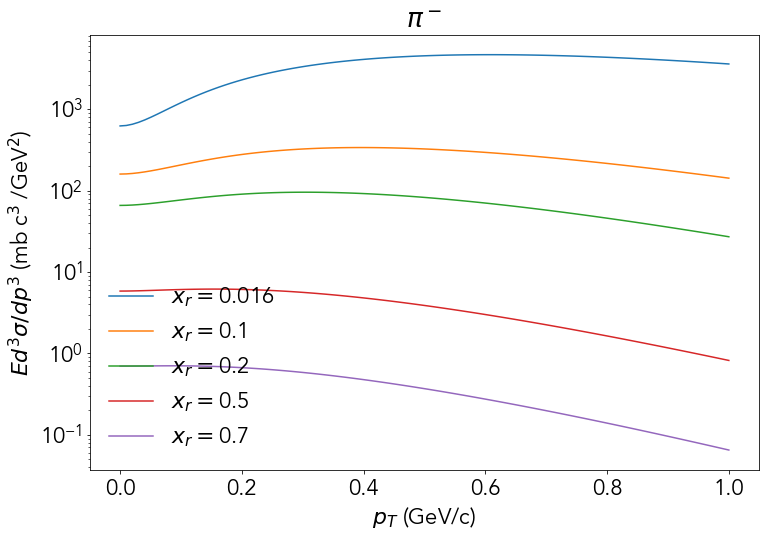

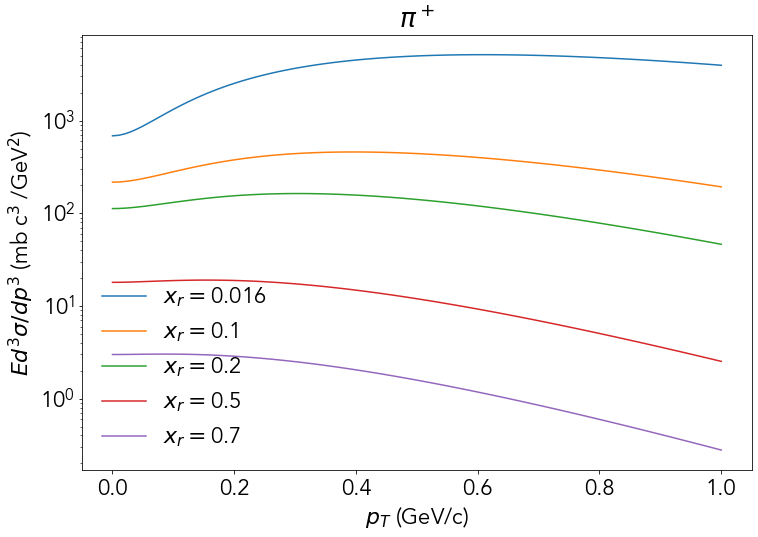

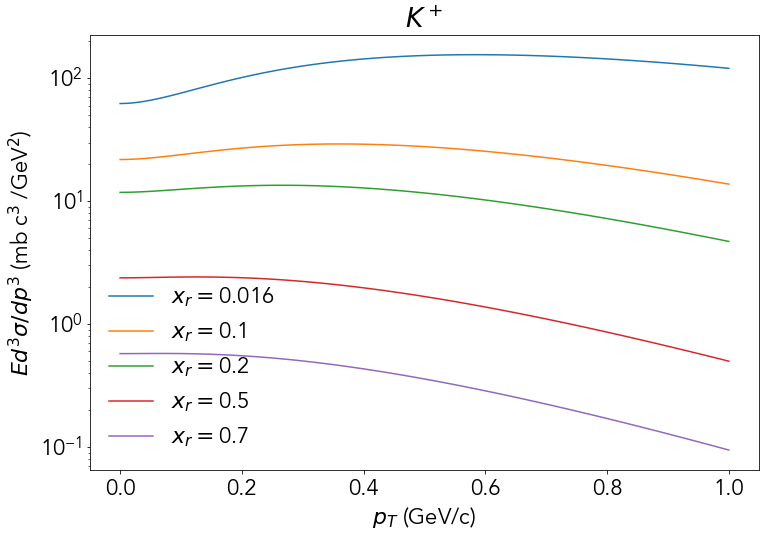

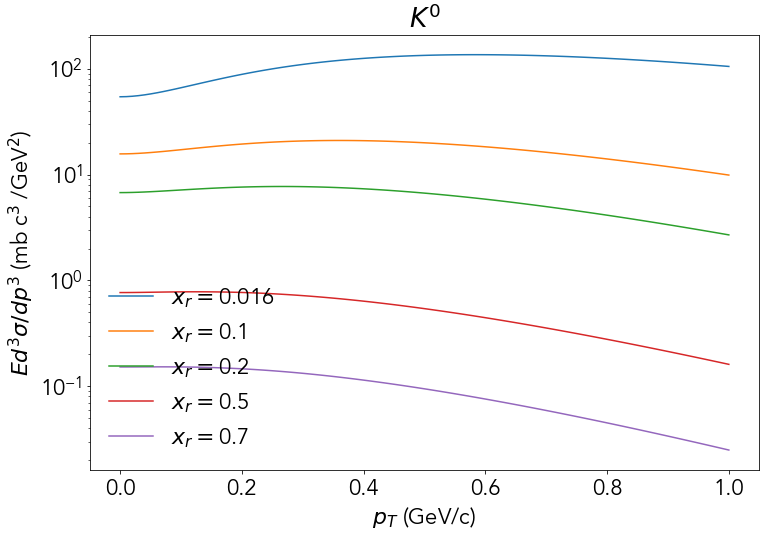

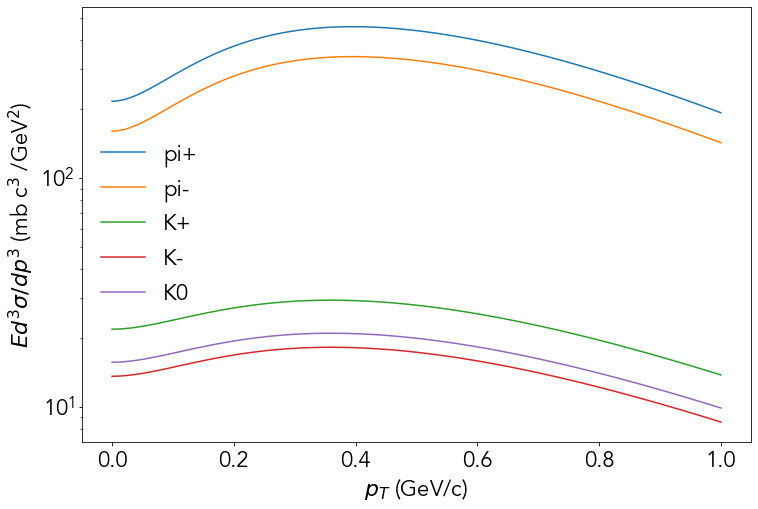

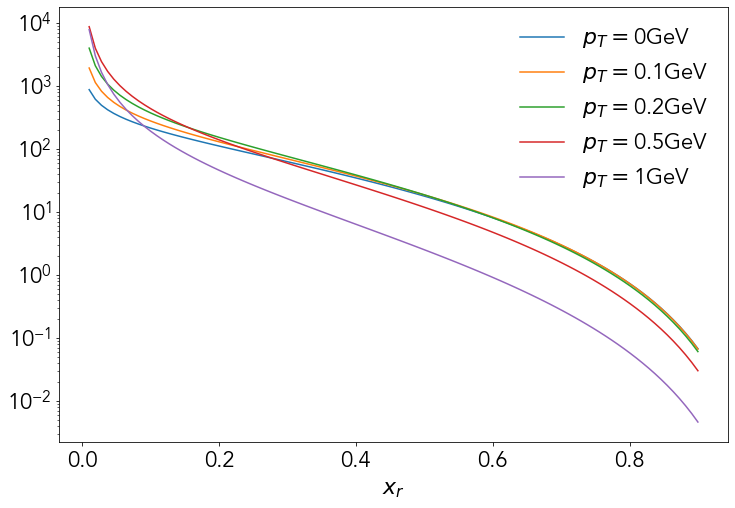

In [3]:
bmpt=BMPTFlux()


kPlus=Particle.from_name("K0")
print(kPlus.name[0])
print(kPlus.charge)
    
pt=np.linspace(0,1,100) #In GeV

fig, ax = plt.subplots()

xrVals=[1.6e-2,0.1,0.2,0.5,0.7]
for xr in xrVals:
    ax.plot(pt,bmpt.getPiKFlux(Particle.from_name("pi-"),xr,pt*GeV),label="$x_r= $"+str(xr))
ax.set_xlabel("$p_T$ (GeV/c)")
ax.set_ylabel("$E d^3 \sigma/dp^3$ (mb c$^3$ /GeV$^2$)")
ax.set_yscale('log')
ax.legend()
ax.set_title("$\pi^-$")



fig, ax = plt.subplots()
xrVals=[1.6e-2,0.1,0.2,0.5,0.7]
for xr in xrVals:
    ax.plot(pt,bmpt.getPiKFlux(Particle.from_name("pi+"),xr,pt*GeV),label="$x_r= $"+str(xr))
ax.set_xlabel("$p_T$ (GeV/c)")
ax.set_ylabel("$E d^3 \sigma/dp^3$ (mb c$^3$ /GeV$^2$)")
ax.set_yscale('log')
ax.legend()
ax.set_title("$\pi^+$")


fig, ax = plt.subplots()
xrVals=[1.6e-2,0.1,0.2,0.5,0.7]
for xr in xrVals:
    ax.plot(pt,bmpt.getPiKFlux(Particle.from_name("K+"),xr,pt*GeV),label="$x_r= $"+str(xr))
ax.set_xlabel("$p_T$ (GeV/c)")
ax.set_ylabel("$E d^3 \sigma/dp^3$ (mb c$^3$ /GeV$^2$)")
ax.set_yscale('log')
ax.legend()
ax.set_title("$K^+$")


fig, ax = plt.subplots()
xrVals=[1.6e-2,0.1,0.2,0.5,0.7]
for xr in xrVals:
    ax.plot(pt,bmpt.getPiKFlux(Particle.from_name("K0"),xr,pt*GeV),label="$x_r= $"+str(xr))
ax.set_xlabel("$p_T$ (GeV/c)")
ax.set_ylabel("$E d^3 \sigma/dp^3$ (mb c$^3$ /GeV$^2$)")
ax.set_yscale('log')
ax.legend()
ax.set_title("$K^0$")


fig, ax = plt.subplots()
xr=0.1
for partName in ['pi+','pi-','K+','K-','K0']:
    ax.plot(pt,bmpt.getPiKFlux(Particle.from_name(partName),xr,pt*GeV),label=partName)
ax.set_xlabel("$p_T$ (GeV/c)")
ax.set_ylabel("$E d^3 \sigma/dp^3$ (mb c$^3$ /GeV$^2$)")
ax.set_yscale('log')
ax.legend()

xr=np.linspace(1e-2,0.9,100)
fig, ax = plt.subplots()
ax.set_yscale('log')
for pt in [0,0.1,0.2,0.5,1]:
    ax.plot(xr,bmpt.getPiKFlux(Particle.from_name("pi+"),xr,pt*GeV),label="$p_T= $"+str(pt)+"GeV")
ax.set_xlabel("$x_r$")
ax.legend()



## What is $x_r$?
There are a whole cavalcade of confusing parameterisations and scaling variables used in the BMPT paper. Here we will try and explain a few of them. Then we will plot them for the NuMI beam for different particles.

### $x_{Lab}$
$x_{Lab}$ is the ratio of the momenta of a produced (detected in a hadron production experiment) particle to the incident momentum both in the reference frame. So for NuMI the incident momentum is 120GeV/c.
$$x_{Lab} = \frac{p}{p_{inc}}$$

So a $\pi^+$ with $p=10$GeV/c wil have a $x_{Lab}=\frac{10 GeV/c}{120 GeV/c}=0.0833$


### $x_{F}$
$x_F$ is the Feynamn scaling variable and is a measure of the longitduinal momentum and is defined as
$$x_F=2 \frac{p^*_L}{\sqrt{s}}$$
where $p^*_L = |p^*| \cos \theta^*$ is the longitudinal momentum of the detected particle and $\sqrt{s}=\sqrt{2m_p c^2 E + 2m_p^2 c^4}$ is the total energy in the centre-of-momentum frame. 

So if our $\pi^+$ was colinear with the incoming protons it would have $p_L=10$GeV/c in the lab frame, but what would it be in the centre of mass frame? Well the link between lab and centre-of-mass frames is given by
$$ p^*_L = \gamma \left(p_L - \beta * E_{lab} \right)$$

where $\beta = \frac{p_{L} c}{m_p c^2 + E_{lab}}$ and $\gamma = \frac{1}{\sqrt{1-\beta^2}}$. For 120 GeV/c protons $\beta=0.9922$ and $\gamma= 8.028$.


### $x_r$
$x_r$ is the radial scaling variable and is defined as
$$x_r = \frac{E^*}{E^*_{max}}$$
where $E^*_{max}$ is the maximum energy kinematically available and can be written as
$$E^*_{max} = \frac{s - \bar{M_x^2} + M_c^2}{2 \sqrt{s}}$$
where $M_c$ is the mass of the detected particle and $\bar{M_x}$ is the minimum possible mass of the unspecified particles. A tabulation of $\bar{M_x}$ is


| Inclusive Reaction | Exclusive Reaction |   $\bar{M_x}$  |
| ------------------ | ------------------ | -------------- |
| $p+p \rightarrow \pi^+ + $ anything    |  $p+p \rightarrow \pi^+ + p + n$ | 1.88GeV/c$^2$ |
| $p+p \rightarrow \pi^- + $ anything    |  $p+p \rightarrow \pi^- + \pi^+ + p + p$ |2.02GeV/c$^2$ |
| $p+p \rightarrow \pi^0 + $ anything    |  $p+p \rightarrow \pi^0 + p + p$ | 1.88GeV/c$^2$ |
| $p+p \rightarrow K^+ + $ anything      |  $p+p \rightarrow \Lambda^0 + p + K^+$ | 2.05GeV/c$^2$ |
| $p+p \rightarrow K^- + $ anything      |  $p+p \rightarrow p + p + K^+ + K^-$ | 2.37GeV/c$^2$ |
| $p+p \rightarrow p + $ anything        |  $p+p \rightarrow + p + p$ | 0.94GeV/c$^2$ |
| $p+p \rightarrow \bar{p}+ + $ anything |  $p+p \rightarrow p+ p + p + \bar{p}$ | 2.81GeV/c$^2$ |



Beta 0.9147624549065122
Gamma 2.4752956682365945
sqrt(s): 52.9963345389659
E*max 26.498351054776162
p*max 26.49798348418974
plabmax 125.59075988184526
0.1770447124621665
[  1157.55794249   2336.1026308    3481.21851005   4618.3493867
   5752.28045509   6884.60287032   8016.00130497   9146.81972045
  10277.25004366  11407.40787223  12537.36701191  13667.17680742
  14796.87150542  15926.47562095  17056.00716606  18185.47967267
  19314.90350431  20444.28673241  21573.63573689  22702.95562732
  23832.25054416  24961.52387815  26090.77843269  27220.01654576
  28349.24018264  29478.45100736  30607.6504383   31736.83969191
  32866.01981739  33995.19172452  35124.35620604  36253.51395591
  37382.66558422  38511.8116295   39640.95256891  40770.08882671
  41899.22078146  43028.34877194  44157.4731023   45286.59404634
  46415.71185122  47544.82674059  48673.93891739  49803.04856612
  50932.15585493  52061.26093738  53190.36395398  54319.46503358
  55448.5642945   56577.66184564  57706.75778736  5

/Users/rjn/Library/CloudStorage/OneDrive-UniversityCollegeLondon/Experiments/nova/PyOscCalc/LazyKinematics.py:91: RuntimeWarning: invalid value encountered in sqrt
  plstar=np.sqrt(Estar**2 -pT**2 -(particle.mass)**2)


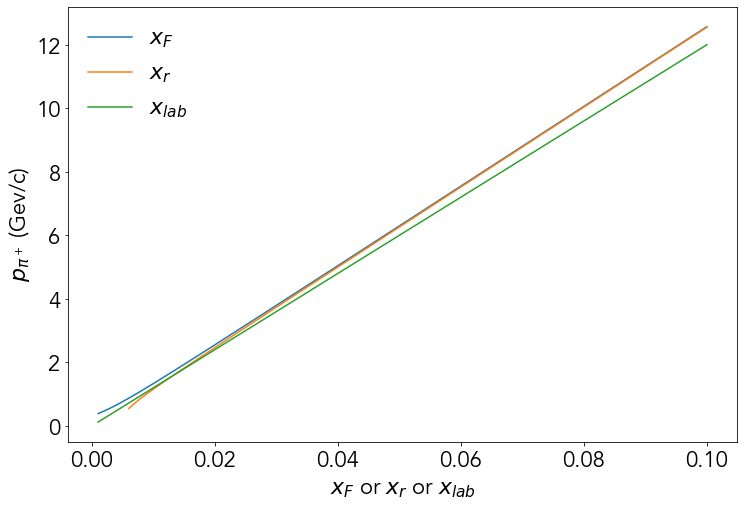

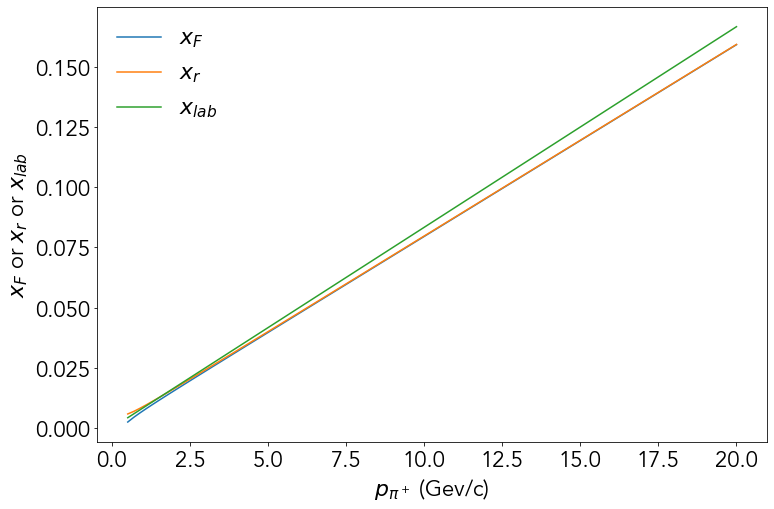

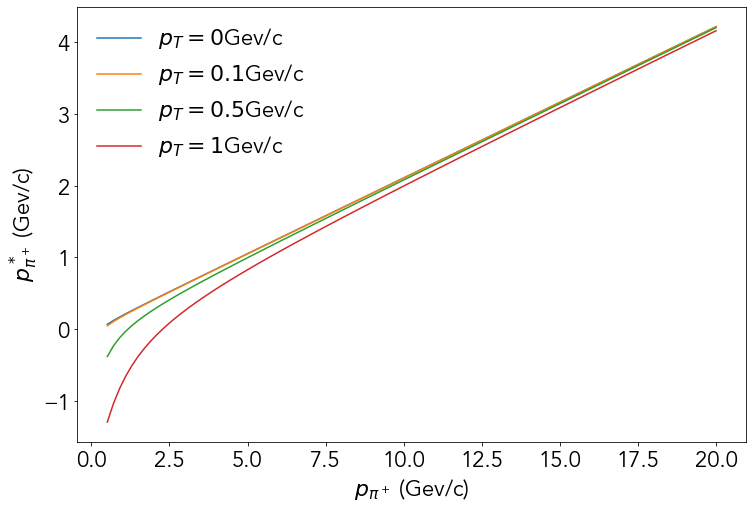

In [4]:
nt = NeutrinoTarget() #Defaults to carbon target, 120GeV/c protons

proton=Particle.from_pdgid(2212)
piPlus=Particle.from_pdgid(211)
beta=nt.getBeta()
print("Beta",beta)
print("Gamma",lk.getGammaFromBeta(beta))
print("sqrt(s):",nt.getSqrtS()/GeV)
Estarmax=nt.getEStarMaxPP(piPlus)
pstarmax=np.sqrt(Estarmax**2 - (piPlus.mass)**2)
plabmax=lk.getGammaFromBeta(beta)*(pstarmax + beta*Estarmax)
print("E*max",Estarmax/GeV)
print("p*max",pstarmax/GeV)
print("plabmax",plabmax/GeV)

print(10*proton.mass/nt.getSqrtS())


fig, ax = plt.subplots()
x=np.linspace(1e-3,0.1,100)
pT=0
ax.plot(x,nt.getPlabFromxF(x,pT*GeV,piPlus)/GeV,label="$x_F$")
ax.plot(x,nt.getPlabFromxr(x,pT*GeV,piPlus)/GeV,label="$x_r$")
ax.plot(x,nt.getPlabFromxLab(x,pT*GeV,piPlus)/GeV,label="$x_{lab}$")
ax.set_ylabel("$p_{\pi^+}$ (Gev/c)")
ax.set_xlabel("$x_F$ or $x_r$ or $x_{lab}$")
ax.legend()

fig, ax = plt.subplots()
plab=np.linspace(0.51,20,100)
pt=0
ax.plot(plab,nt.getXf(plab*GeV,pt*GeV,piPlus),label="$x_F$")
ax.plot(plab,nt.getXr(plab*GeV,pt*GeV,piPlus),label="$x_r$")
ax.plot(plab,nt.getXlab(plab*GeV,pt*GeV,piPlus),label="$x_{lab}$")
ax.set_xlabel("$p_{\pi^+}$ (Gev/c)")
ax.set_ylabel("$x_F$ or $x_r$ or $x_{lab}$")
ax.legend()


fig, ax = plt.subplots()
plab=np.linspace(0.51,20,100)
ax.plot(plab,nt.getPstar(plab*GeV,0*GeV,piPlus)/GeV,label='$p_T=0$Gev/c')
ax.plot(plab,nt.getPstar(plab*GeV,0.1*GeV,piPlus)/GeV,label='$p_T=0.1$Gev/c')
ax.plot(plab,nt.getPstar(plab*GeV,0.5*GeV,piPlus)/GeV,label='$p_T=0.5$Gev/c')
ax.plot(plab,nt.getPstar(plab*GeV,1*GeV,piPlus)/GeV,label='$p_T=1$Gev/c')
ax.set_xlabel("$p_{\pi^+}$ (Gev/c)")
ax.set_ylabel("$p^*_{\pi^+}$ (Gev/c)")
ax.legend()


pLab=nt.getPlabFromxr(xr,pT*GeV,piPlus)
print(pLab,pT)



(100, 100)


Text(0.5, 1.0, '$\\pi^-$ BMPT Flux')

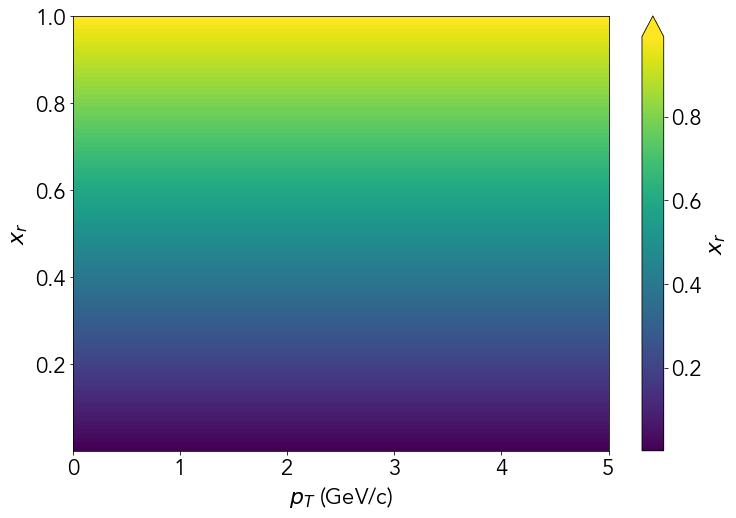

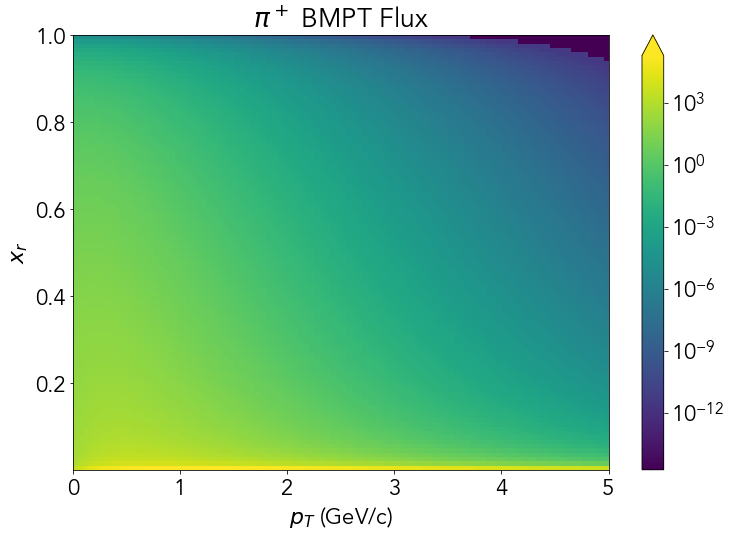

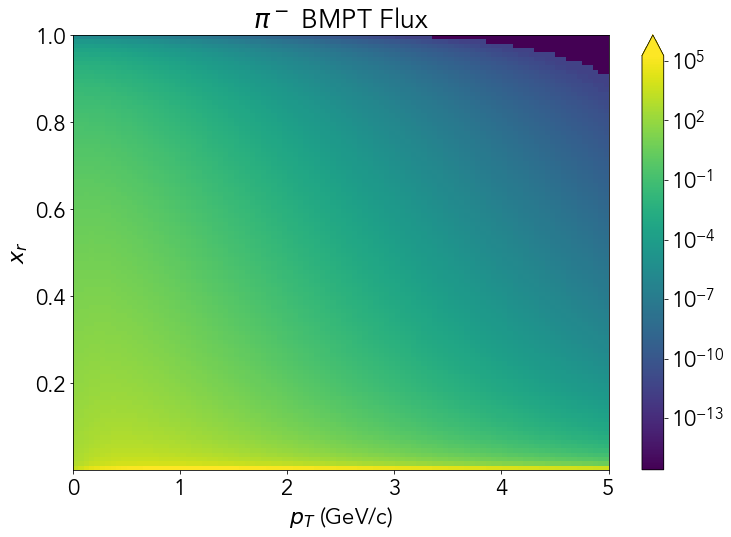

In [7]:
#Plot Flux in xr vs pt space
import matplotlib.colors as colors
xrVals,ptVals = np.mgrid[1e-3:1:0.01, 0:5:0.05]
print(xrVals.shape)

fig, ax = plt.subplots()
pcm=ax.imshow(xrVals,origin='lower',extent=[0,5,1e-3,1],aspect='auto')
ax.set_ylabel("$x_r$")
ax.set_xlabel("$p_T$ (GeV/c)")
cb=fig.colorbar(pcm, extend='max')
cb.set_label("$x_r$")

fig, ax = plt.subplots()
flux=bmpt.getPiKFlux(Particle.from_name("pi+"),xrVals,ptVals*GeV)
pcm=ax.imshow(flux,origin='lower',extent=[0,5,1e-3,1],aspect='auto',norm=colors.LogNorm(vmin=flux.min(), vmax=flux.max()))
cb=fig.colorbar(pcm, extend='max')
ax.set_ylabel("$x_r$")
ax.set_xlabel("$p_T$ (GeV/c)")
ax.set_title("$\pi^+$ BMPT Flux")

fig, ax = plt.subplots()
flux=bmpt.getPiKFlux(Particle.from_name("pi-"),xrVals,ptVals*GeV)
pcm=ax.imshow(flux,origin='lower',extent=[0,5,1e-3,1],aspect='auto',norm=colors.LogNorm(vmin=flux.min(), vmax=flux.max()))
fig.colorbar(pcm, extend='max')
ax.set_ylabel("$x_r$")
ax.set_xlabel("$p_T$ (GeV/c)")
ax.set_title("$\pi^-$ BMPT Flux")